In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from math import sqrt

In [3]:
data = pd.read_csv('../../../data/kc_house_data.csv')

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df = data.drop(['view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027


In [7]:
df.corr().sort_values('price')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.031057,0.002888,-0.185771,-0.261570,-0.347210,0.069846,1.000000
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.361592,0.447865,0.424037,1.000000,-0.225209,-0.347210
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.087244,-0.061858,0.016669,0.022137,-0.225209,1.000000,0.069846
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786


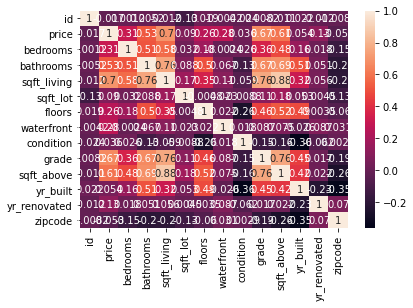

In [8]:
sns.heatmap(df.corr(), annot=True);

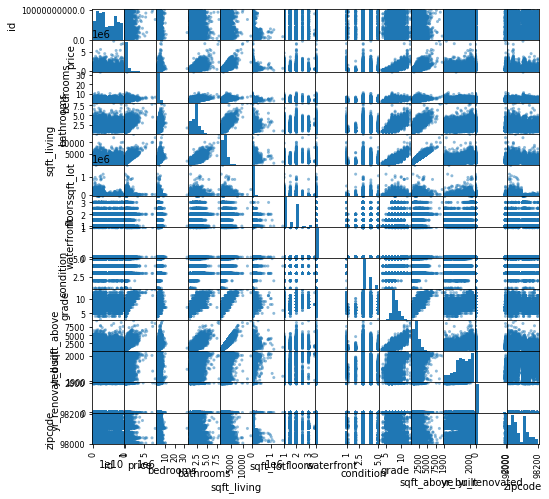

In [9]:
pd.plotting.scatter_matrix(df, figsize=(8,8));
plt.show()

In [10]:
df.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,1,5,780,0.0,1942,NaN,98168
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,2,4,430,0.0,1912,0.0,98014
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,1,5,730,0.0,1943,0.0,98168
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,3,6,860,0.0,1954,0.0,98146
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,2,5,520,0.0,1951,0.0,98168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,3,12,6720,1280.0,2009,0.0,98004
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,3,13,6200,3000.0,2001,NaN,98039
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,3,13,8860,1030.0,2001,0.0,98039
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,3,11,7680,2360.0,1940,2001.0,98004


In [11]:
new_df = data.drop(['view', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date', 'id', 'grade', 'zipcode'], axis=1)

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


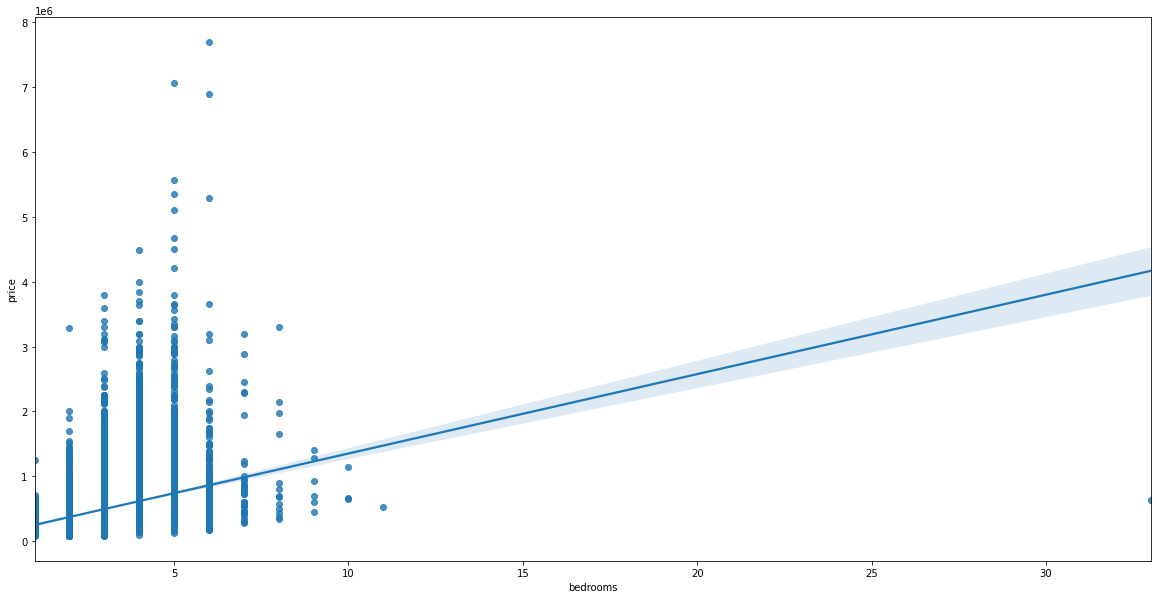

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(df['bedrooms'], df['price']);

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


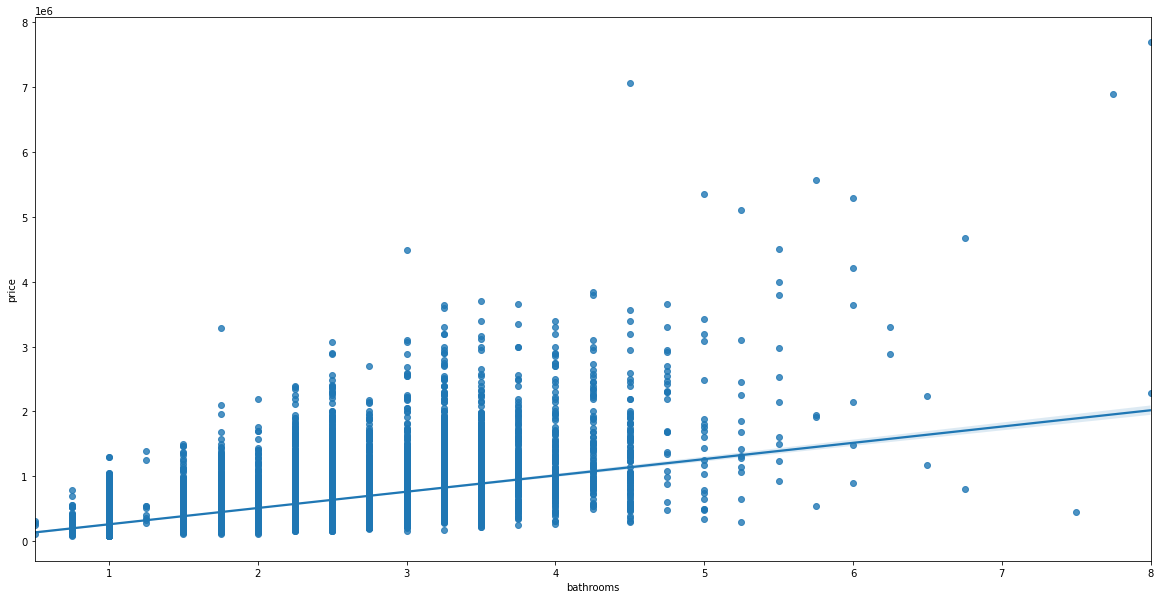

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(df['bathrooms'], df['price']);

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


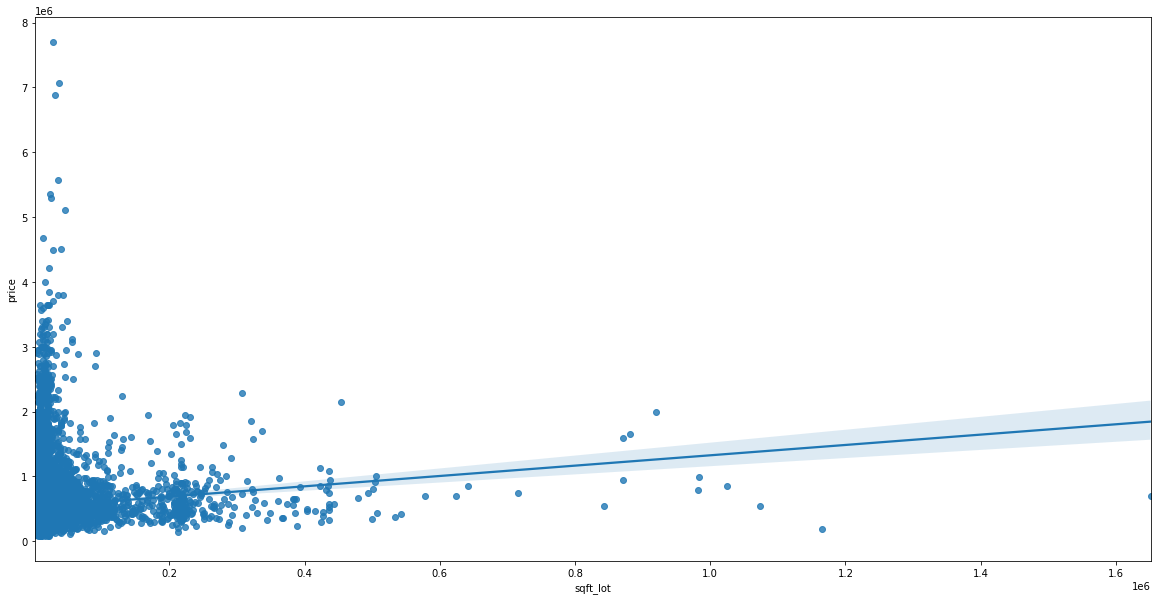

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(df['sqft_lot'], df['price']);

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


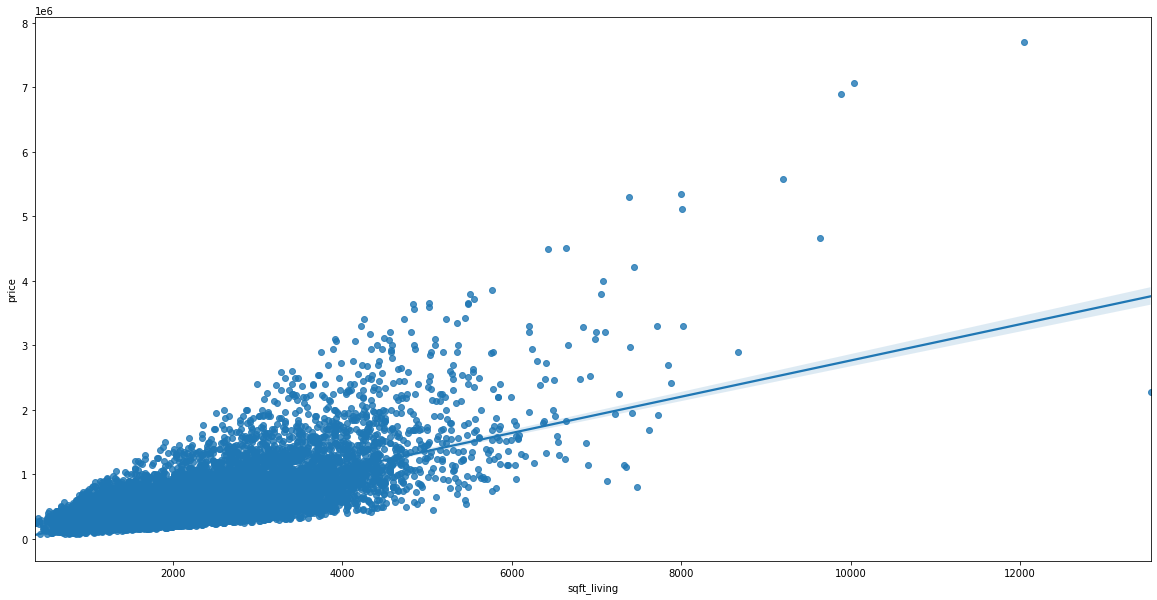

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(df['sqft_living'], df['price']);

In [16]:
min(df['sqft_lot'])

520

In [17]:
X = sm.add_constant(df['sqft_living'])
y = df['price']
model1 = sm.OLS(y, X)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:11:57   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


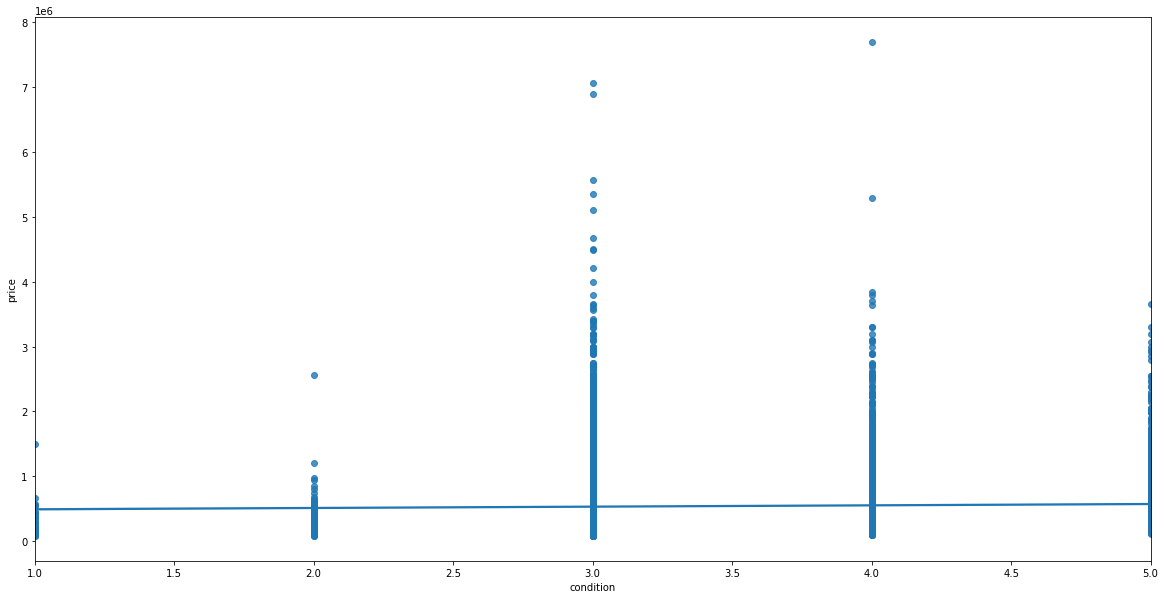

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(df['condition'], df['price']);

C:\Users\gnr40\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


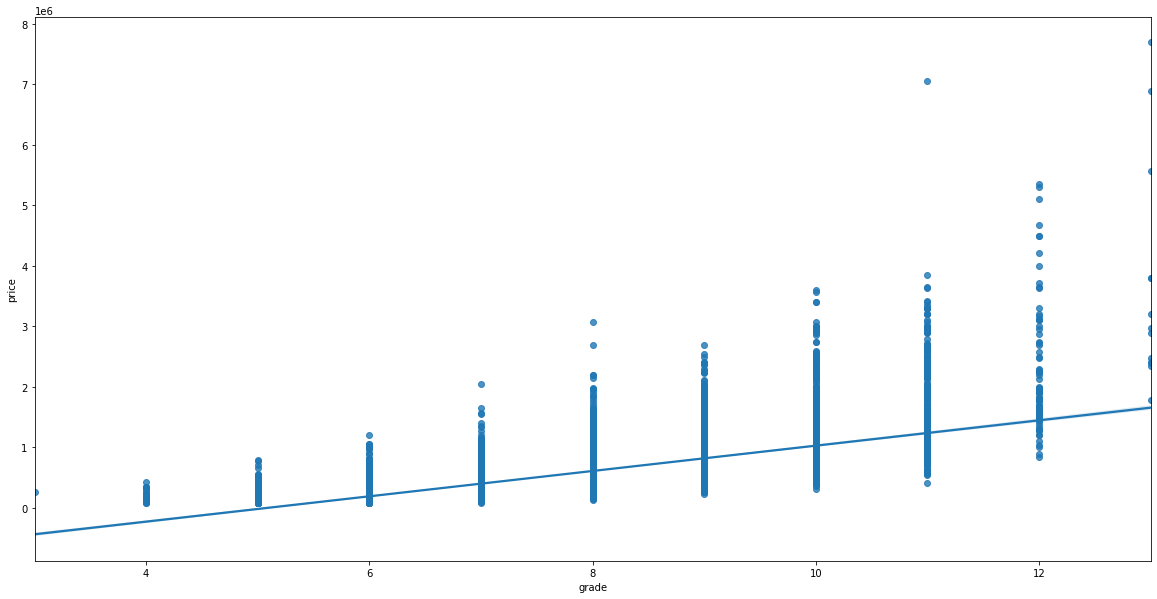

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(df['grade'], df['price']);

In [20]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [21]:
df = data.drop(['view', 'zipcode', 'lat', 'long', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

In [22]:
yrs = [int(x[-4:]) for x in df['date']]
df['date'] = yrs

In [23]:
for x in range(len(df)):
    if df['yr_renovated'][x] == True:
        if df['yr_renovated'][x] > 0:
            df['yr_built'][x] = df['yr_renovated'][x]

In [24]:
df['renovated'] = [int(x) for x in (df['yr_renovated'] > 0)]

In [25]:
df['renovated'] = [int(x) for x in (df['yr_renovated'] > 0)]

In [26]:
df['yr_renovated/built'] = df['yr_built']

In [27]:
df['age'] = df['date'] - df['yr_renovated/built']

In [29]:
df.drop(['yr_renovated','yr_built', 'date'], axis=1, inplace=True)

In [30]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,renovated,yr_renovated/built,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,0.0,0,1955,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1,1951,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,0,1933,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,0,1965,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,0,1987,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,0,2009,5
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,0,2014,1
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,0,2009,5
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,0.0,0,2004,11


<AxesSubplot:xlabel='sqft_living'>

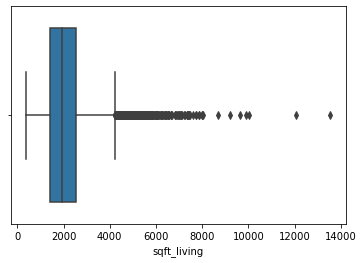

In [55]:
sns.boxplot(x=df['sqft_living'])

In [32]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [36]:
Q1 = df['bedrooms'].quantile(.25)

In [37]:
Q3 = df['bedrooms'].quantile(.75)

In [38]:
IQR = Q3 - Q1
IQR

1.0

In [39]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [40]:
lower_lim

1.5

In [41]:
upper_lim

5.5

In [50]:
def outliers(column):
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    return lower_lim, upper_lim


In [51]:
outliers('bedrooms')

(1.5, 5.5)

In [53]:
outliers('bathrooms')

(0.625, 3.625)

In [54]:
outliers('sqft_living')

(-250.0, 4230.0)

In [56]:
outliers('sqft_lot')

(-3427.5, 19152.5)

In [57]:
outliers('floors')

(-0.5, 3.5)

In [58]:
outliers('waterfront')

(0.0, 0.0)

In [59]:
outliers('condition')

(1.5, 5.5)

In [60]:
outliers('grade')

(5.5, 9.5)

In [63]:
outliers('age')

(-49.5, 130.5)